<a href="https://colab.research.google.com/github/Nabaranjan/Machine-Learning-Project/blob/main/Simple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('Heightweight.csv')

In [4]:
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Text(0, 0.5, 'Height')

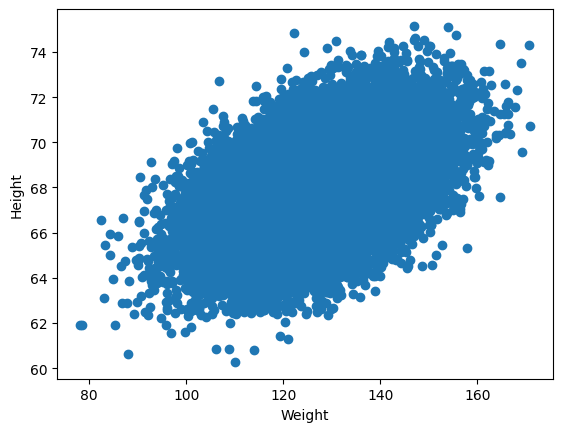

In [8]:
## scatter plot

plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


In [10]:
# correlation

df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


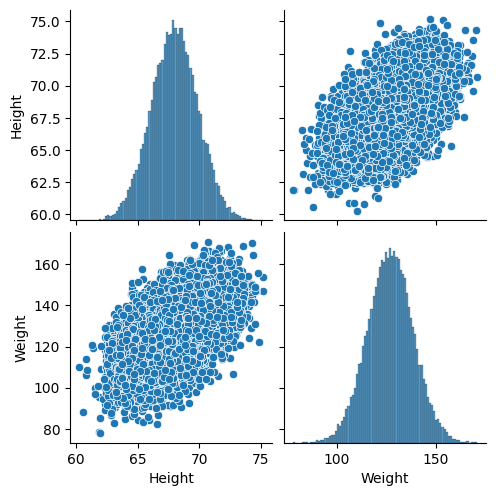

In [11]:
## Seaborn for visualization

import seaborn as sns
sns.pairplot(df)

In [12]:
## Independent and dependent features

df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [22]:
## Independent and dependent features
X = df[['Weight']]
y = df['Height']

In [18]:
## Independent and dependent features

X = df[['Weight']]
np.array(X).shape

(25000, 1)

In [20]:
X_series = df[['Weight']]
np.array(X_series).shape

(25000, 1)

In [23]:
np.array(y).shape

(25000,)

In [24]:
##Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [26]:
X_train.shape

(18750, 1)

In [27]:
## standardization

from sklearn.preprocessing import StandardScaler


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [34]:
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]])

In [36]:
# Apply Linear Regression

from sklearn.linear_model import LinearRegression


In [40]:
regression=LinearRegression(n_jobs=-1)

In [41]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [42]:
regression

LinearRegression(n_jobs=-1)

In [44]:
print("Coefficient or slope:",regression.coef_)
print("Intercpt or slope:",regression.intercept_)

Coefficient or slope: [0.94883892]
Intercpt or slope: 67.9938252704


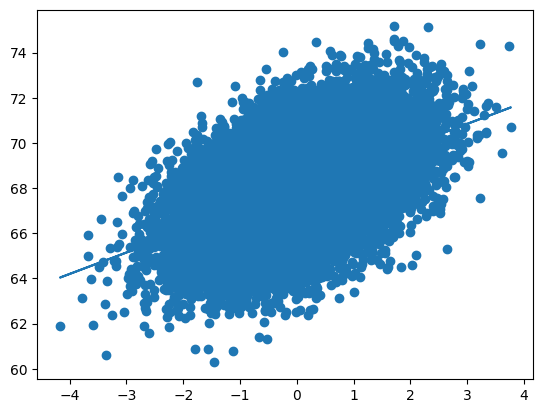

In [46]:
## plot Trainig data plot best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [47]:
## Prediction Of test data
y_pred = regression.predict(X_test)

In [49]:
## Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.7333807993730996
1.3166150322297803
1.6532939240719116


# R Square

R^2 = 1 - SSR/SST

R^2 = Coefficient determination SSR = sum of squares of residuals SST = total sum of square

In [51]:
from sklearn.metrics import r2_score

In [52]:
score = r2_score(y_test,y_pred)
print(score)

0.2592643941428425


Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

In [53]:
# display adjusted R-Squared

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25914583850810224

In [54]:
# OLS Linear Regression

import statsmodels.api as sm


In [56]:
model = sm.OLS(y_train,X_train).fit()

In [57]:
prediction=model.predict(X_test)
print(prediction)

[ 0.58878817 -1.2322543   0.72762503 ...  0.70158088 -1.10815295
  0.0023379 ]


In [58]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Thu, 05 Dec 2024   Prob (F-statistic):                      0.0561
Time:                        08:39:16   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
## Prediction for new data

regression.predict(scaler.transform([[70]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.33743443])